<b>Dans ce notebook on nettoie le dataset sur la base des éléments décrits par le notebook Describe_Dataset</b>

# Table of contents
1. [Load du dataset](#load)
2. [Mise à l'écart des données US](#purge_us)
3. [Mise à l'écart des features redondantes](#purge_redund)
4. [Mise à l'écart des features 100% NaN](#purge_nan)
5. [Création feature PNNS_3](#create_pnns3)
6. [Traitement des enregistrements du groupe 'unknown'](#unknown)
7. [Traitement des outliers](#outliers) 
8. [Imputations](#imputations)

    8.1 [High density features](#impute_high_density)
    
    8.2 [Mid density features](#impute_mid_density)
   


<b  style="background-color:tomato;font-size:14px;">1. LOAD DU DATASET<b>
    <a id="load"></a>   

In [149]:
import numpy as np 
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline

try:
    del data
except:
    dummy=1

#On ne prend qu'un échantillon du fait des limitations mémoire de la machine
data=pd.read_csv('../dataset/en.openfoodfacts.org.products.csv',sep='\t',low_memory=False)


<b  style="background-color:tomato;font-size:14px;">2. MISE A L'ECART DES DONNEES US<b>
    <a id="purge_us"></a>  

In [150]:
us_to_remove = data[data['countries_tags']=="en:united-states"].index
print('data shape before removal: ' + str(data.shape))
data.drop(us_to_remove, inplace = True)
print('data shape after removal: ' + str(data.shape))

data shape before removal: (250000, 183)
data shape after removal: (247796, 183)


<b  style="background-color:tomato;font-size:14px;">3. MISE A L'ECART DES FEATURES REDONDANTES<b>
    <a id="purge_redund"></a>  

In [151]:
columns_to_remove = []
for s in data.columns:
    if "_tags" in s: 
        t = s.replace('_tags', '')
        u = s.replace('_tags', '_en')
        print("{:<20} 'no suffix' -> {} ; '_en' suffix -> {}".format(s,t in data.columns, u in data.columns))
        if t in data.columns: columns_to_remove.append(t)
        if u in data.columns: columns_to_remove.append(u)
print('data shape before removal: ' + str(data.shape))
data.drop(columns_to_remove, axis = 1, inplace = True)
print('data shape after removal: ' + str(data.shape))

packaging_tags       'no suffix' -> True ; '_en' suffix -> False
brands_tags          'no suffix' -> True ; '_en' suffix -> False
categories_tags      'no suffix' -> True ; '_en' suffix -> True
origins_tags         'no suffix' -> True ; '_en' suffix -> True
manufacturing_places_tags 'no suffix' -> True ; '_en' suffix -> False
labels_tags          'no suffix' -> True ; '_en' suffix -> True
emb_codes_tags       'no suffix' -> True ; '_en' suffix -> False
cities_tags          'no suffix' -> True ; '_en' suffix -> False
countries_tags       'no suffix' -> True ; '_en' suffix -> True
traces_tags          'no suffix' -> True ; '_en' suffix -> True
additives_tags       'no suffix' -> True ; '_en' suffix -> True
ingredients_from_palm_oil_tags 'no suffix' -> True ; '_en' suffix -> False
ingredients_that_may_be_from_palm_oil_tags 'no suffix' -> True ; '_en' suffix -> False
states_tags          'no suffix' -> True ; '_en' suffix -> True
data shape before removal: (247796, 183)
data shape after re

<b  style="background-color:tomato;font-size:14px;">4. MISE A L'ECART DES FEATURES 100% NaN<b>
    <a id="purge_nan"></a>  

In [152]:
percent_of_nans = data.isnull().sum().sort_values(ascending=False) / data.shape[0] * 100

In [153]:
useless_features = percent_of_nans[percent_of_nans == 100].index
print(useless_features)
print('data shape before removal: ' + str(data.shape))
#data.drop(useless_features, axis=1, inplace=True)
print('data shape after removal: ' + str(data.shape))

Index(['-stearic-acid_100g', '-myristic-acid_100g', '-erucic-acid_100g',
       '-mead-acid_100g', '-gondoic-acid_100g', '-elaidic-acid_100g',
       '-dihomo-gamma-linolenic-acid_100g', '-melissic-acid_100g',
       '-cerotic-acid_100g', '-lignoceric-acid_100g', 'nucleotides_100g',
       '-palmitic-acid_100g', '-lauric-acid_100g', '-capric-acid_100g',
       '-caprylic-acid_100g', 'nutrition-score-uk_100g', '-caproic-acid_100g',
       'water-hardness_100g', '-butyric-acid_100g', 'no_nutriments',
       'allergens_en', '-nervonic-acid_100g'],
      dtype='object')
data shape before removal: (247796, 162)
data shape after removal: (247796, 162)


<b  style="background-color:tomato;font-size:14px;">5. CREATION FEATURE PNNS_3<b>
    <a id="create_pnns3"></a> 

In [154]:
import math
def new_pnns(row):
    aggregates = {"Fruit juices":"Fruit juices","Fruit nectars":"Fruit juices",
                    "Legumes":"Vegetables","vegetables":"Vegetables",
                    "Vegetables":"Vegetables",
                    "fruits":"Fruits","Fruits":"Fruits",
                    "Artificially sweetened beverages":"Sweetened beverages","Sweetened beverages":"Sweetened beverages",
                    "Pizza pies and quiche":"Pizza pies and quiches","Pizza pies and quiches":"Pizza pies and quiches",
                    "cereals":"Cereals","Cereals":"Cereals"}
    
    val_group_2 = row['pnns_groups_2']
    val_group_1 = row['pnns_groups_1']
    new_val=val_group_2
    for i in aggregates: 
        if isinstance(val_group_2, str):
            if val_group_2 in i:
                return aggregates[i]    
        else:
            if math.isnan(val_group_2):
                return 'unknown'        

    return new_val    


In [155]:
data['pnns_groups_3'] = data.apply (lambda row: new_pnns(row), axis=1)

<b  style="background-color:tomato;font-size:14px;">6. TRAITEMENT DES ENREGISTREMENTS DE GROUPE 'UNKNOWN'<b>
    <a id="unknown"></a>  

In [156]:
unknowns = data.loc[data['pnns_groups_3'] == 'unknown']
print('data shape before removal: ' + str(data.shape))
data.drop(unknowns.index, inplace = True)  
print('data shape after removal: ' + str(data.shape))

data shape before removal: (247796, 163)
data shape after removal: (72917, 163)


<b  style="background-color:tomato;font-size:14px;">7. TRAITEMENT DES OUTLIERS<b>
    <a id="outliers"></a>  

In [157]:
def dropOutliers(data,features,sigma_factor):
    
    for feature in features:
        subset = data[[feature]]

        #valuate median and standard deviation 
        feature_median = subset[feature].median()
        feature_std = subset[feature].std()
        feature_median_new = feature_median
        feature_std_new = feature_std
        
        outliers = data.loc[data[feature] > (feature_median + (sigma_factor * feature_std))]
        if outliers.shape[0] != 0:
            data.drop(outliers.index, inplace = True)    
        
    return data
        

In [158]:
gram_cols = [col for col in data.columns if '_100g' in col]
print('data shape before removal: ' + str(data.shape))
data = dropOutliers(data,gram_cols,10)
print('data shape after removal: ' + str(data.shape))

data shape before removal: (72917, 163)
data shape after removal: (72716, 163)


In [159]:
quantite = ['energy_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-pp_100g',
            'vitamin-b6_100g','vitamin-b9_100g','pantothenic-acid_100g', 'biotin_100g',
            'salt_100g','fat_100g','fiber_100g','sugars_100g']

In [160]:
sigma = [0 for _ in range(len(quantite))]
mediane = [0 for _ in range(len(quantite))]
for i in range(len(quantite)):
    colonne = quantite[i]
    mediane[i] = data[pd.notnull(data[colonne])][colonne].median()
    test = data[pd.notnull(data[colonne])][colonne]
    test = test.sort_values()    
    sigma[i] = np.std(test[:-25])   

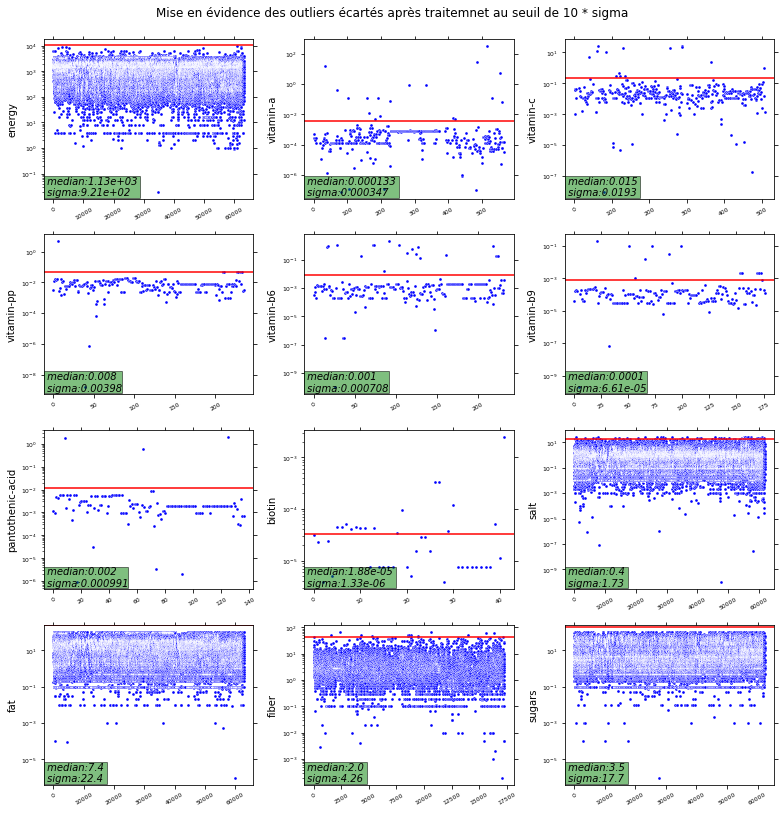

In [161]:
tPlot, axes = plt.subplots(nrows=4, ncols=3, sharex=False, sharey=False, figsize=(11,11))
axes = np.array(axes)
sigma_factor = 10
i=0
for ax in axes.reshape(-1):
    colonne = quantite[i]
    test = data[pd.notnull(data[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=6)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 10)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=mediane[i] + sigma_factor*sigma[i], color='r', linestyle='-')
    
    ax.text(0., 0.02, ' median:{:.3} \n sigma:{:.3}'.format(mediane[i], sigma[i]),
            style='italic', transform=ax.transAxes, fontsize = 10,
            bbox={'facecolor':'green', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, "Mise en évidence des outliers écartés après traitemnet au seuil de " + str(sigma_factor) + " * sigma", ha='center', fontsize = 12)
plt.tight_layout()

<b  style="background-color:tomato;font-size:14px;">8. IMPUTATIONS<b>
    <a id="imputations"></a>  

expliquer pourquoi on le fait et les risques (biais)

<b  style="background-color:tomato;font-size:12px;">&nbsp;&nbsp;&nbsp;&nbsp;8.1. High Density Features<b>
    <a id="impute_high_density"></a>  

In [162]:
from sklearn.impute import KNNImputer
pd.options.mode.chained_assignment = None
import math

"""
knn imputation function 
"""
def knn_imputation(df_knn,nn):
    
    imputer = KNNImputer(n_neighbors=nn, weights='uniform', metric='nan_euclidean')

    df_filled = imputer.fit_transform(df_knn)

    return df_filled[:,1]

"""
mean imputation function 
"""
def mean_imputation(df,feature):
    df_feature_mean = df[feature].mean()

    df.loc[(df[feature].isnull()),feature]=df_feature_mean

    return df[feature]

"""
add value labels to bar plot function 
"""
def add_value_labels(ax, spacing=5):

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

"""
imputation algorithm 
"""
def imputation(data,features,type):
    mean_updates=pd.DataFrame()
    mean_dict={"feature":[],"original_mean":[],"original_std":[],"new_mean":[],"new_std":[]}
    
    cpt_feature=0
    for feature in features.index:
        subset = data[['categories_tags',feature]]

        #valuate mean and standard deviation before knn algorithm
        feature_mean = subset[feature].mean()
        feature_std = subset[feature].std()
        feature_mean_new = feature_mean
        feature_std_new = feature_std

        subset = subset[subset["categories_tags"].notna()]

        i=[]
        for k in range(subset.shape[0]):
            i.append(0)
        #add dummy column as knn only works at least 2 numerical columns subsets     
        subset['dummy']=i
        cpt_categ=0
        for col in subset['categories_tags'].unique():
            subset_cat=subset.loc[data['categories_tags'] == col]

            #We don't try imputation if category does not have a single valuated row or if category does not have any nan
            feature_categ_mean = subset_cat[feature].mean()
            if (not math.isnan(feature_categ_mean)) and subset_cat[feature].isnull().values.any():
                subset_imputation=subset_cat[['dummy',feature]]
                if type == "knn":
                    new_values = knn_imputation(subset_imputation,3)
                if type == "mean":
                    new_values = mean_imputation(subset_imputation,feature)
                subset_cat['newvalues']=new_values

                #Identify row index where values has been changed. Update with imputed value in the dataframe.
                changed_values=subset_cat.loc[(subset_cat[feature] != subset_cat['newvalues'])]
                for d in changed_values.index:
                    data.at[d, feature] = changed_values.at[d,'newvalues']
            cpt_categ = cpt_categ +1
            
        subset = data[['categories_tags',feature]]
        feature_mean_new = subset[feature].mean()
        feature_std_new = subset[feature].std()

        mean_dict["feature"].append(feature)
        mean_dict["original_mean"].append(feature_mean)
        mean_dict["original_std"].append(feature_std)
        mean_dict["new_mean"].append(feature_mean_new)
        mean_dict["new_std"].append(feature_std_new)
        
        cpt_feature = cpt_feature +1

    mean_updates=pd.DataFrame.from_dict(mean_dict)
    print(mean_updates)
    type="knn"
    plt.figure(figsize=(20,5))

    fig, axes = plt.subplots(4,3, figsize=(16,8))

    plt.suptitle("Imputation par " + type + " - Evolution des moyennes et écart type par catégories imputées (12 premières features)")
    for i, ax in zip(range(12), axes.flat):
        try:
            ax1=ax
            x=['original','imputation']
            ax1.set_xlabel(['original','imputation'])
            ax1.set_ylabel('mean', color='blue')
            ax1.bar(x, [mean_dict['original_mean'][i],mean_dict['new_mean'][i]], color='blue')
            ax1.tick_params(axis='y', labelcolor="blue")
            add_value_labels(ax1)

            ax2 = ax1.twinx()  

            ax2.set_ylabel('std', color="red") 
            ax2.plot(x, [mean_dict['original_std'][i],mean_dict['new_std'][i]], color='red')
            ax2.tick_params(axis='y', labelcolor='red')    

            ax.set_title(mean_dict['feature'][i])
        except:
            break
            
    plt.tight_layout()    

    plt.show() 

    try:
        del subset
        del subset_imputation
        del subset_cat
        del mean_updates
    except:
        k=0
    
    return data

              feature  original_mean  original_std     new_mean     new_std
0  saturated-fat_100g       4.988869      7.332253     4.772691    7.278957
1         sugars_100g      11.746883     17.811200    11.939285   18.517875
2            fat_100g      16.454614     22.407930    16.005872   22.510870
3  carbohydrates_100g      27.228951     27.647563    26.758072   27.756871
4       proteins_100g       7.710337      8.246805     7.418274    8.148773
5         energy_100g    1227.611685    927.886993  1199.874068  931.583765


<Figure size 1440x360 with 0 Axes>

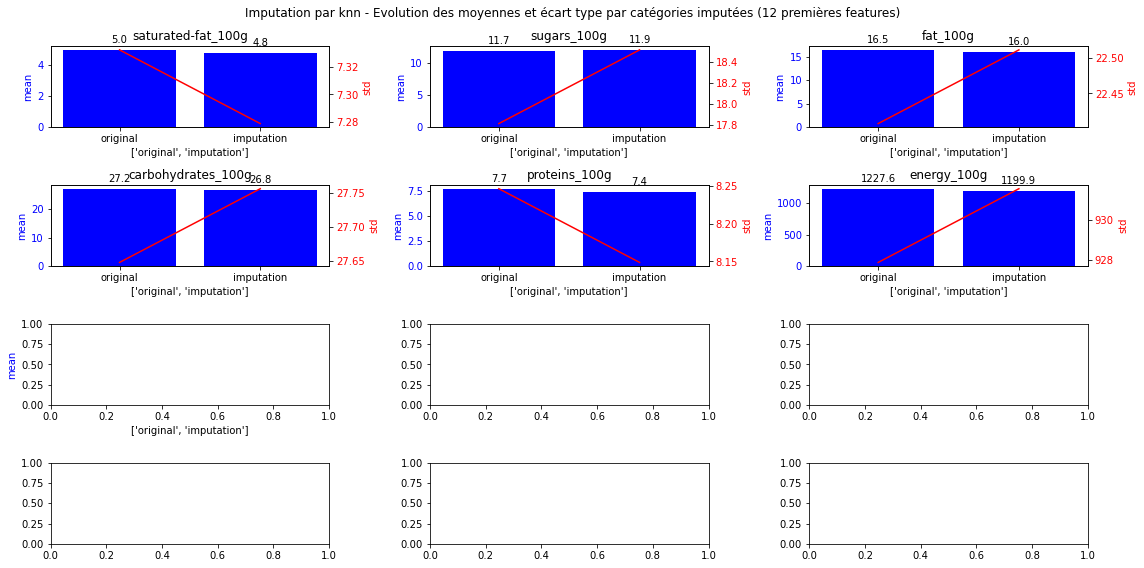

In [163]:
to_be_completed = percent_of_nans[(percent_of_nans < 25) & (percent_of_nans > 0)]
to_be_completed_high_density = to_be_completed.filter(like='_100g')
data=imputation(data,to_be_completed_high_density,'knn')

<b  style="background-color:tomato;font-size:12px;">&nbsp;&nbsp;&nbsp;&nbsp;8.2. Mid Density Features<b>
    <a id="impute_mid_density"></a>  

            feature  original_mean  original_std    new_mean     new_std
0  energy-kcal_100g     296.479975    223.877033  288.494117  222.791562
1         salt_100g       0.979331      1.798297    0.947552    1.725545
2       sodium_100g       0.391735      0.719307    0.379026    0.690206


<Figure size 1440x360 with 0 Axes>

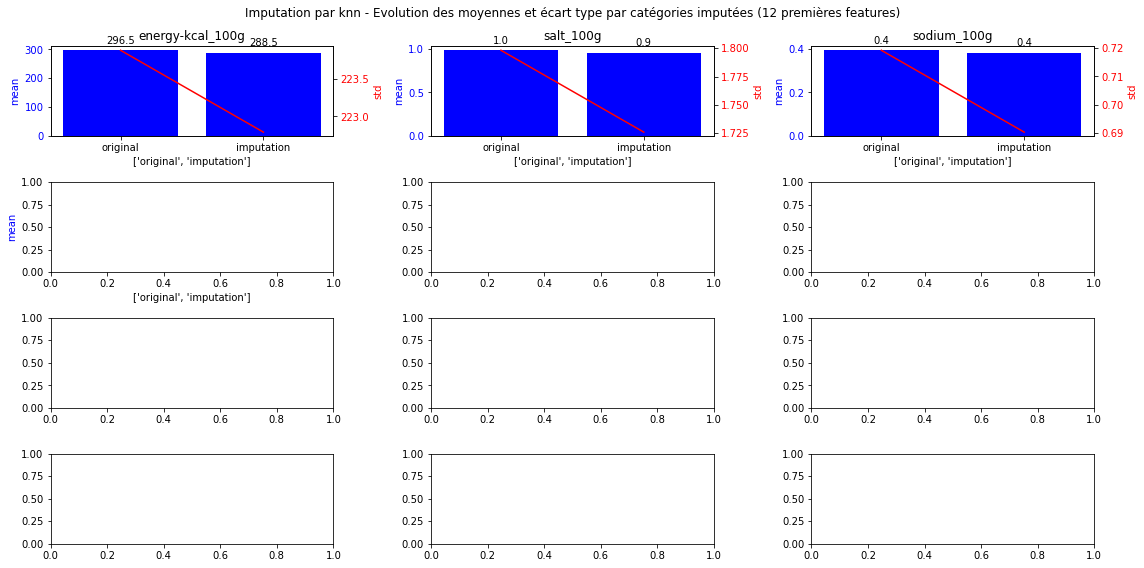

In [164]:
to_be_completed = percent_of_nans[(percent_of_nans < 50) & (percent_of_nans >= 25 )]
to_be_completed_average_density = to_be_completed.filter(like='_100g')
data=imputation(data,to_be_completed_average_density,'mean')

In [165]:
data.to_csv('../dataset/cleaned-dataset.csv', sep='\t', encoding='utf-8')